<a href="https://colab.research.google.com/github/yoonseong00/colab/blob/main/House_prices1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

plt.style.use('seaborn')
sns.set(font_scale=1.5)

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

<ipython-input-1-cd64d2aa3f2e>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# 1. Load Data

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/hose_prices_folder/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/hose_prices_folder/test.csv")

In [ ]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# set index
train_df.set_index('Id', inplace=True)
test_df.set_index('Id', inplace=True)
len_train_df = len(train_df)
len_test_df = len(test_df)

# 2. Feature Selection - Variables of Corrleation >= 0.3

* **고려해야 할 변수가 많을 땐** 각 **독립변수와 종속변수 간의 상관관계**를 검토해보는 것이 좋다.
* 모든 변수를 사용하는 것도 좋지만 그 중 **좀더 의미 있는 변수만을 골라내어 모델을 구축하는 것이 모델의 예측 정확도를 높이는 방법**이다.
* corr()함수를 통해 dataframe내의 모든 변수간의 상관관계를 그린 후 상관관계가 0.3이상인 변수만 heatmap으로 출력하였다.



In [ ]:
corrmat = train_df.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>=0.3]
top_corr_features

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 [Text(0.5, 0, 'LotFrontage'),
  Text(1.5, 0, 'OverallQual'),
  Text(2.5, 0, 'YearBuilt'),
  Text(3.5, 0, 'YearRemodAdd'),
  Text(4.5, 0, 'MasVnrArea'),
  Text(5.5, 0, 'BsmtFinSF1'),
  Text(6.5, 0, 'TotalBsmtSF'),
  Text(7.5, 0, '1stFlrSF'),
  Text(8.5, 0, '2ndFlrSF'),
  Text(9.5, 0, 'GrLivArea'),
  Text(10.5, 0, 'FullBath'),
  Text(11.5, 0, 'TotRmsAbvGrd'),
  Text(12.5, 0, 'Fireplaces'),
  Text(13.5, 0, 'GarageYrBlt'),
  Text(14.5, 0, 'GarageCars'),
  Text(15.5, 0, 'GarageArea'),
  Text(16.5, 0, 'WoodDeckSF'),
  Text(17.5, 0, 'OpenPorchSF'),
  Text(18.5, 0, 'SalePrice')])

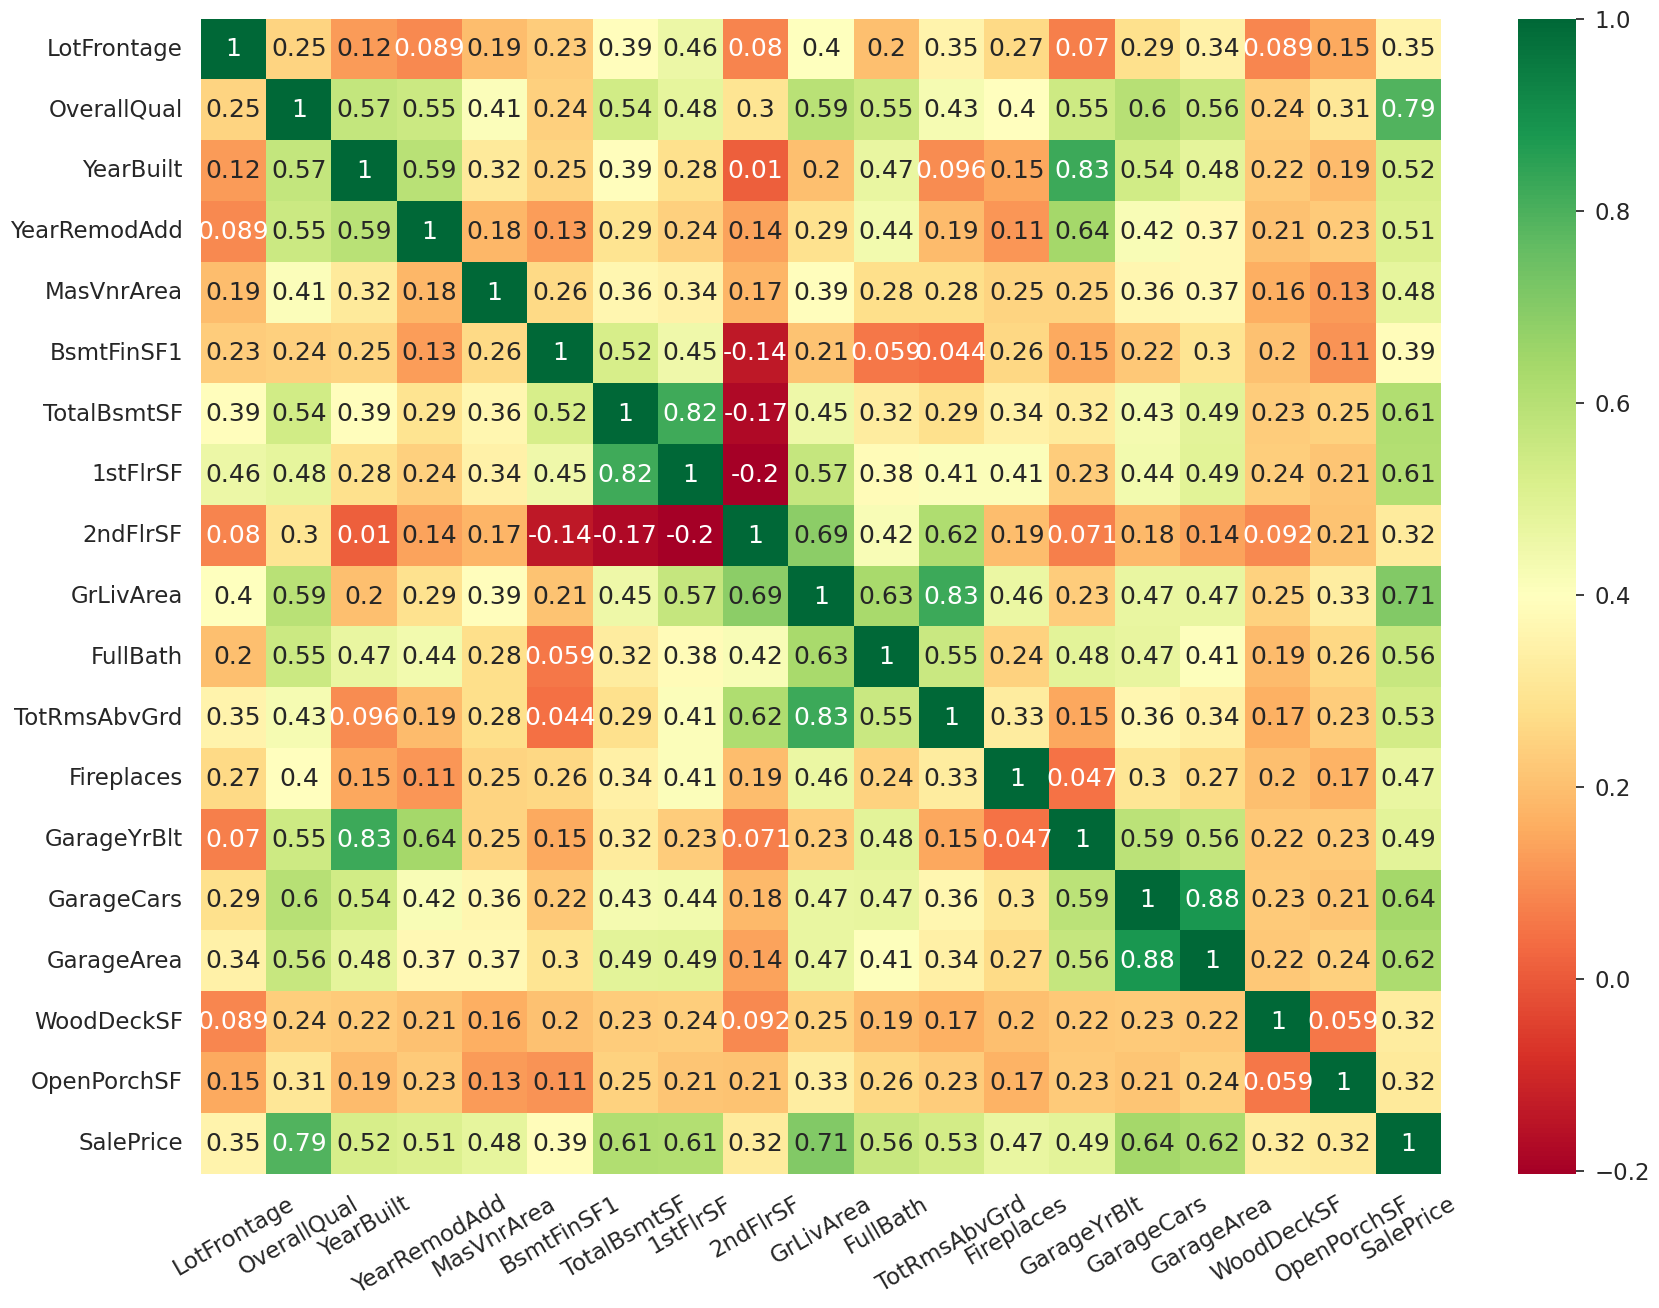

In [ ]:
# heatmap
plt.figure(figsize=(20,15))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.xticks(rotation=30)
# plt.xticks(rotation="돌릴각도(0도면 가로쓰기 90도면 원래 모양)")

- 위 상관관계 표를 보았을때, 판매가 기준 Grlivarea(지상 생활권 면적), 전반적인 퀄리티의 상관관계가 비례하면서 유의미한 상관이 있다는 것을 알 수 있다.

In [ ]:
# split y_label
train_y_label = train_df['SalePrice'] 	# target 값을 미리 분리하였음.
train_df.drop(['SalePrice'], axis=1, inplace=True)

# 3. Concat train & test set

In [ ]:
# concat train & test
boston_df = pd.concat((train_df, test_df), axis=0)
boston_df_index = boston_df.index

In [ ]:
print('Length of Boston Dataset : ',len(boston_df))
boston_df.head()

Length of Boston Dataset :  2919


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


- train과 test 셋에 동일한 feature engineering을 적용해주기 위해 우선 두개의 데이터 셋을 하나로 합쳐주었다.
- 합쳐주니 2,919개로 데이터가 늘었다.

# 4. Check NaN ratio and Remove null ratio >= 0.5

- 데이터를 처리할 때 항상 Null값을 어떻게 처리할지 고민해야 한다. 추후 모델에 입력되는 input값에는 절대 어떠한 Null 값이 있어서는 안되며 있더라도 에러가 발생하기 때문에 미리 꼭 처리해주어야 한다.
- 우선 각 칼럼별로 **Null값 비율이 50%이상인 칼럼을 찾아 해당 칼럼을 제거**해주었다.
- 보통 null값 처리를 위해 평균, 최대값, 최소값 등으로 대체하곤 하는데 위와 같이 대부분의 칼럼이 Null인 데이터는 차라리 없애주는 것이 좋다.

In [ ]:
# check null
check_null = boston_df.isna().sum() / len(boston_df)

In [ ]:
# columns of null ratio >= 0.5
check_null[check_null >= 0.5]

Alley          0.932169
PoolQC         0.996574
Fence          0.804385
MiscFeature    0.964029
dtype: float64

In [ ]:
# remove columns of null ratio >= 0.5
remove_cols = check_null[check_null >= 0.5].keys()
boston_df = boston_df.drop(remove_cols, axis=1)

boston_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


# 5. Check Object & Numeric variables

- 해당 데이터 셋에는 수치형 데이터만 있는 것이 아니다. [성별: 남자, 여자], [학급: 햇님반, 꽃님반, 달님반]과 같은 카테고리형 데이터도 존재한다.
- 이러한 카테고리형 데이터는 각 칼럼을 0과 1로 변환해주는 one-hot encoding을 적용해주어 수치값과 가중치를 달리해주어야 한다.
- 수치형 데이터와 카테고리형 데이터를 구분하기 위해 **select_dtypes()**를 이용하였다. parameter값으로 include와 exclude를 적용할 수 있는데 이를 통해 데이터를 분리한다.

In [ ]:
# split object & numeric
boston_obj_df = boston_df.select_dtypes(include='object')	# 카테고리형
boston_num_df = boston_df.select_dtypes(exclude='object')	# 수치형
print('Object type columns:\n',boston_obj_df.columns)
print('---------------------------------------------------------------------------------')
print('Numeric type columns:\n',boston_num_df.columns)

Object type columns:
 Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
---------------------------------------------------------------------------------
Numeric type columns:
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFul

# 6. Change object type to dummy variables

- 위에서 분리한 카테고리형 데이터에 one-hot encoding을 적용하기 위해 pandas의 **pd.get_dummies()**를 적용하였다. one-hot encoding 적용시 [남자, 여자]의 경우 [[1,0], [0,1]]과 같은 형태로 변환된다.

In [ ]:
boston_dummy_df = pd.get_dummies(boston_obj_df, drop_first=True)
boston_dummy_df.index = boston_df_index
boston_dummy_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


# 7. Impute NaN of numeric data to 'mean'

- 4번쨰 과정에서 null값이 50%이상인 변수들을 제거해주었었는데, 그 이하로 null값이 있는 데이터를 마저 처리해주어야 한다.
- 여기서는 각 칼럼의 null값을 해당하는 각 변수들의 **평균(mean)으로 대체(imputation)**해주었다.
- 평균값 대체를 위하여 scikit-learn의 **Imputer 함수**를 이용하였으며, strategy 값에 대체해주고자 하는 이름을 넣어주면 해당 값으로 처리한다.

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(boston_num_df)
boston_num_df_ = imputer.transform(boston_num_df)
boston_num_df = pd.DataFrame(boston_num_df_, columns=boston_num_df.columns, index=boston_df_index)
boston_num_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
2,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
3,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
4,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
5,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


# 8. Merge numeric_df & dummies_df

- 위에서 각각 처리한 카테고리형 데이터와 수치형 데이터를 이제 최종적으로 다시 하나로 merge해준다. merge시 index 순서가 꼬이지 않게 left_index=True, right_index=True를 지정하여 merge를 수행한다.


In [ ]:
boston_df = pd.merge(boston_dummy_df, boston_num_df, left_index=True, right_index=True)
boston_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
2,0,0,1,0,1,0,0,1,0,0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
3,0,0,1,0,1,0,0,0,0,0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
4,0,0,1,0,1,0,0,0,0,0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
5,0,0,1,0,1,0,0,0,0,0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


# 9. Split train & validation & test set

- 모델 학습 및 검증을 위해 데이터를 split한다.
- 여기서 test set의 경우 정답값이 없는 예측해야 하는 값이므로 검증을 위해 validation set을 train set의 20%만큼을 지정해주었다.
- 최종적으로 1,168개의 데이터로 학습 및 292개의 데이터로 검증 후 1,459개의 test셋을 예측한다.

In [ ]:
train_df = boston_df[:len_train_df]
test_df = boston_df[len_train_df:]

train_df['SalePrice'] = train_y_label

print('train set length: ',len(train_df))
print('test set length: ',len(test_df))

train set length:  1460
test set length:  1459


In [ ]:
from sklearn.model_selection import train_test_split

X_train = train_df.drop(['SalePrice'], axis=1)
y_train = train_df['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

X_test = test_df
test_id_idx = test_df.index

In [ ]:
print('X_train : ',len(X_train))
print('X_val : ',len(X_val))
print('X_test :',len(X_test))

X_train :  1168
X_val :  292
X_test : 1459


# 10. Training by XGBRegression Model

- 모델 학습을 위해 최근 kaggle에서 가장 인기 있는 모델인 XGBoost 모델을 이용하였다. 해당 예측은 regression 예측이므로 **XGBRegressor()** 모델을 이용하였다.
- 최적의 모델 파라미터 설정을 위하여 GridSearch를 이용하였으며, 5번의 cross-validation으로 검증을 진행하였다.
- 학습 후 bestparams를 출력하면 최적의 파라미터 값이 출력된다.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

param_dist = {
    'max_depth': [3, 4],
    'n_estimators': [550, 600],
    'colsample_bytree': [0.7, 1],
    'colsample_bylevel': [0.5, 0.7],
}

model = xgb.XGBRegressor()
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=4, cv=3, scoring='neg_mean_squared_error',
                                   n_jobs=-1)

random_search.fit(X_train, y_train)
print("Best parameters:", random_search.best_params_)
print("Best estimator:", random_search.best_estimator_)

Best parameters: {'n_estimators': 600, 'max_depth': 3, 'colsample_bytree': 1, 'colsample_bylevel': 0.7}
Best estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.7, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=600,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)


# 11. Prediction & Score

 - 검증을 위해 **Mean Absolute Error(MAE)** 지표를 활용하였다. MSE를 활용할 경우 error값이 클 경우 그에 제곱된 값이 출력되기 때문에 값이 너무 커져 보기 불편하다는 단점이 있다.

- 검증 결과 validation mae 값이 14,000정도인데, 워낙 집 가격에 대한 값의 범위가 넓기 때문에 이 정도 error값은 심각한 정도는 아니며 납득할만한 수준이라고 할 수 있다.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
pred_train = random_search.predict(X_train)
pred_val = random_search.predict(X_val)

print('train mae score: ', mean_absolute_error(y_train, pred_train))
print('val mae score:', mean_absolute_error(y_val, pred_val))

train mae score:  957.9140324004709
val mae score: 18868.210509417808


- 위에서 나온 validation mae 값이 14,000이라고 나왔는데 gird_search.fit에서 런타임이 너무 길게 나와 chat GPT를 통해 런타임이 적게 나오는 코드를 물어봤더니 random_search를 통해 런타임을 줄일 수 있다고 하여 random_search를 적용

- 따라서 XGB 회귀 모델에서 나온 결과 값이 다르게 나와 validation mae의 값이 19,000에 가까운 값이 나옴. 하지만 위 설명처럼 집 값의 범위가 넓기 때문에 이정도의 error값은 심각한 정도가 아닌 납득이 가능한 정도라고 판단한다.

*******************************************************************************************************

- 이후 validation set을 대상으로 예측을 수행한 후 실제 값과의 결과를 plotting하였다. - 어느 정도 경향을 잘 예측하고 있는 것을 확인할 수 있다.

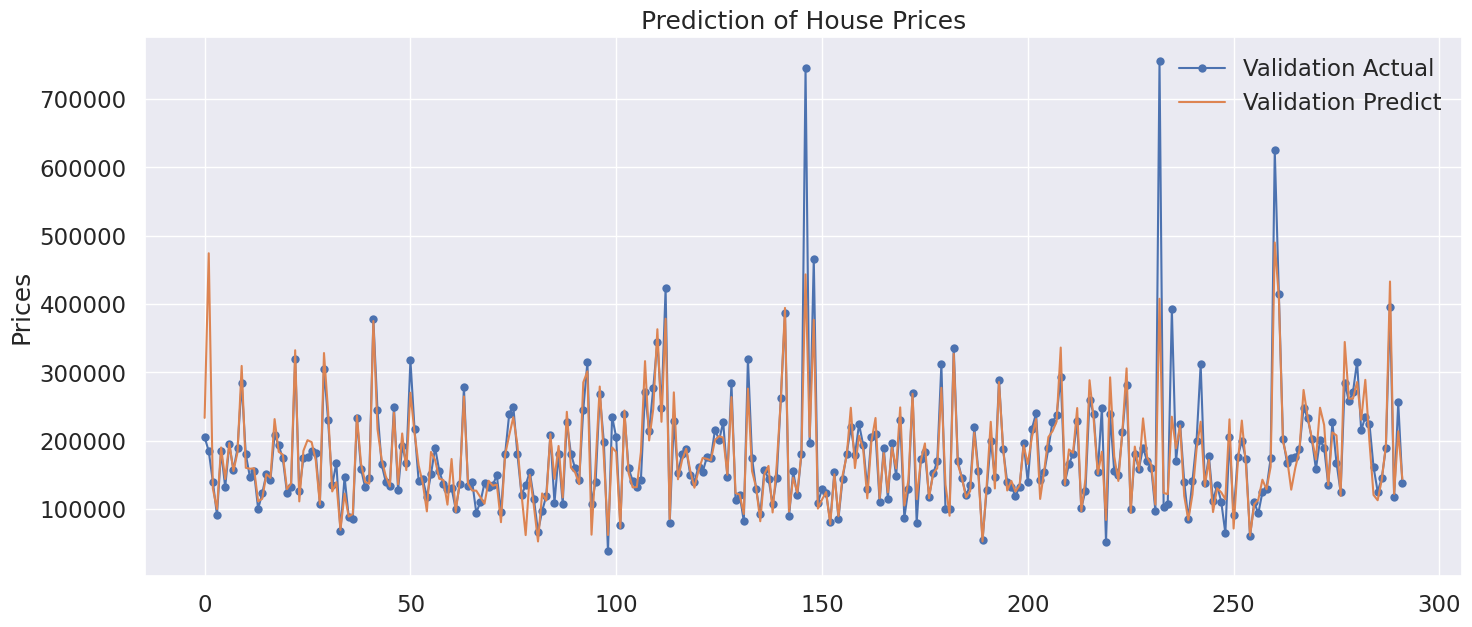

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(range(0, len(y_val)), y_val,'o-', label='Validation Actual')
plt.plot(range(0, len(pred_val)), pred_val, '-', label='Validation Predict')
plt.title('Prediction of House Prices')
plt.ylabel('Prices')
plt.legend()

# 12. Predict test set & Submit submission.csv

In [ ]:
test_y_pred = random_search.predict(X_test)

In [ ]:
id_pred_df = pd.DataFrame()
id_pred_df['Id'] = test_id_idx
id_pred_df['SalePrice'] = test_y_pred

In [ ]:
id_pred_df.to_csv('submission.csv', index=False)